### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
pd.date_range(start='2020-08', periods=8, freq='W')

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [3]:
df = pd.DataFrame({
    'week' : pd.date_range(start='2020-08', periods=8, freq='W'),
    'sales' : [39, 44, 40, 45, 38, 43, 39, np.nan],
    '3MA' : [0] * 8
})

df['3MA'] = df[['sales']].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


### 월별 애플사 주식가격 예측 ( Simple Moving Average )

Text(0.5, 1.0, 'Close Price for Apple')

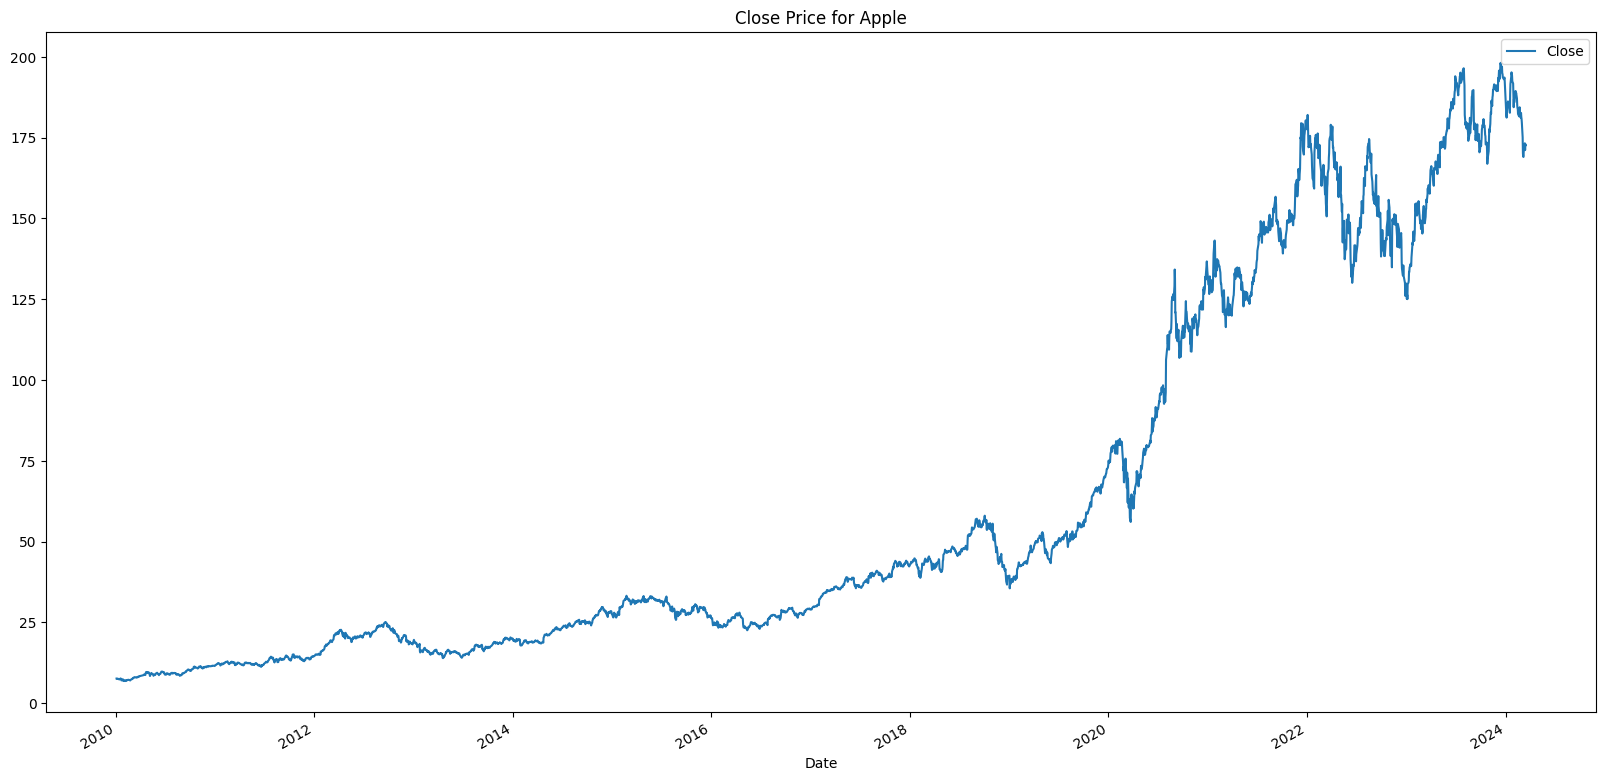

In [5]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

df_apple = fdr.DataReader('AAPL', start='2010')
df_apple.tail(10)

df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

<Axes: xlabel='Date'>

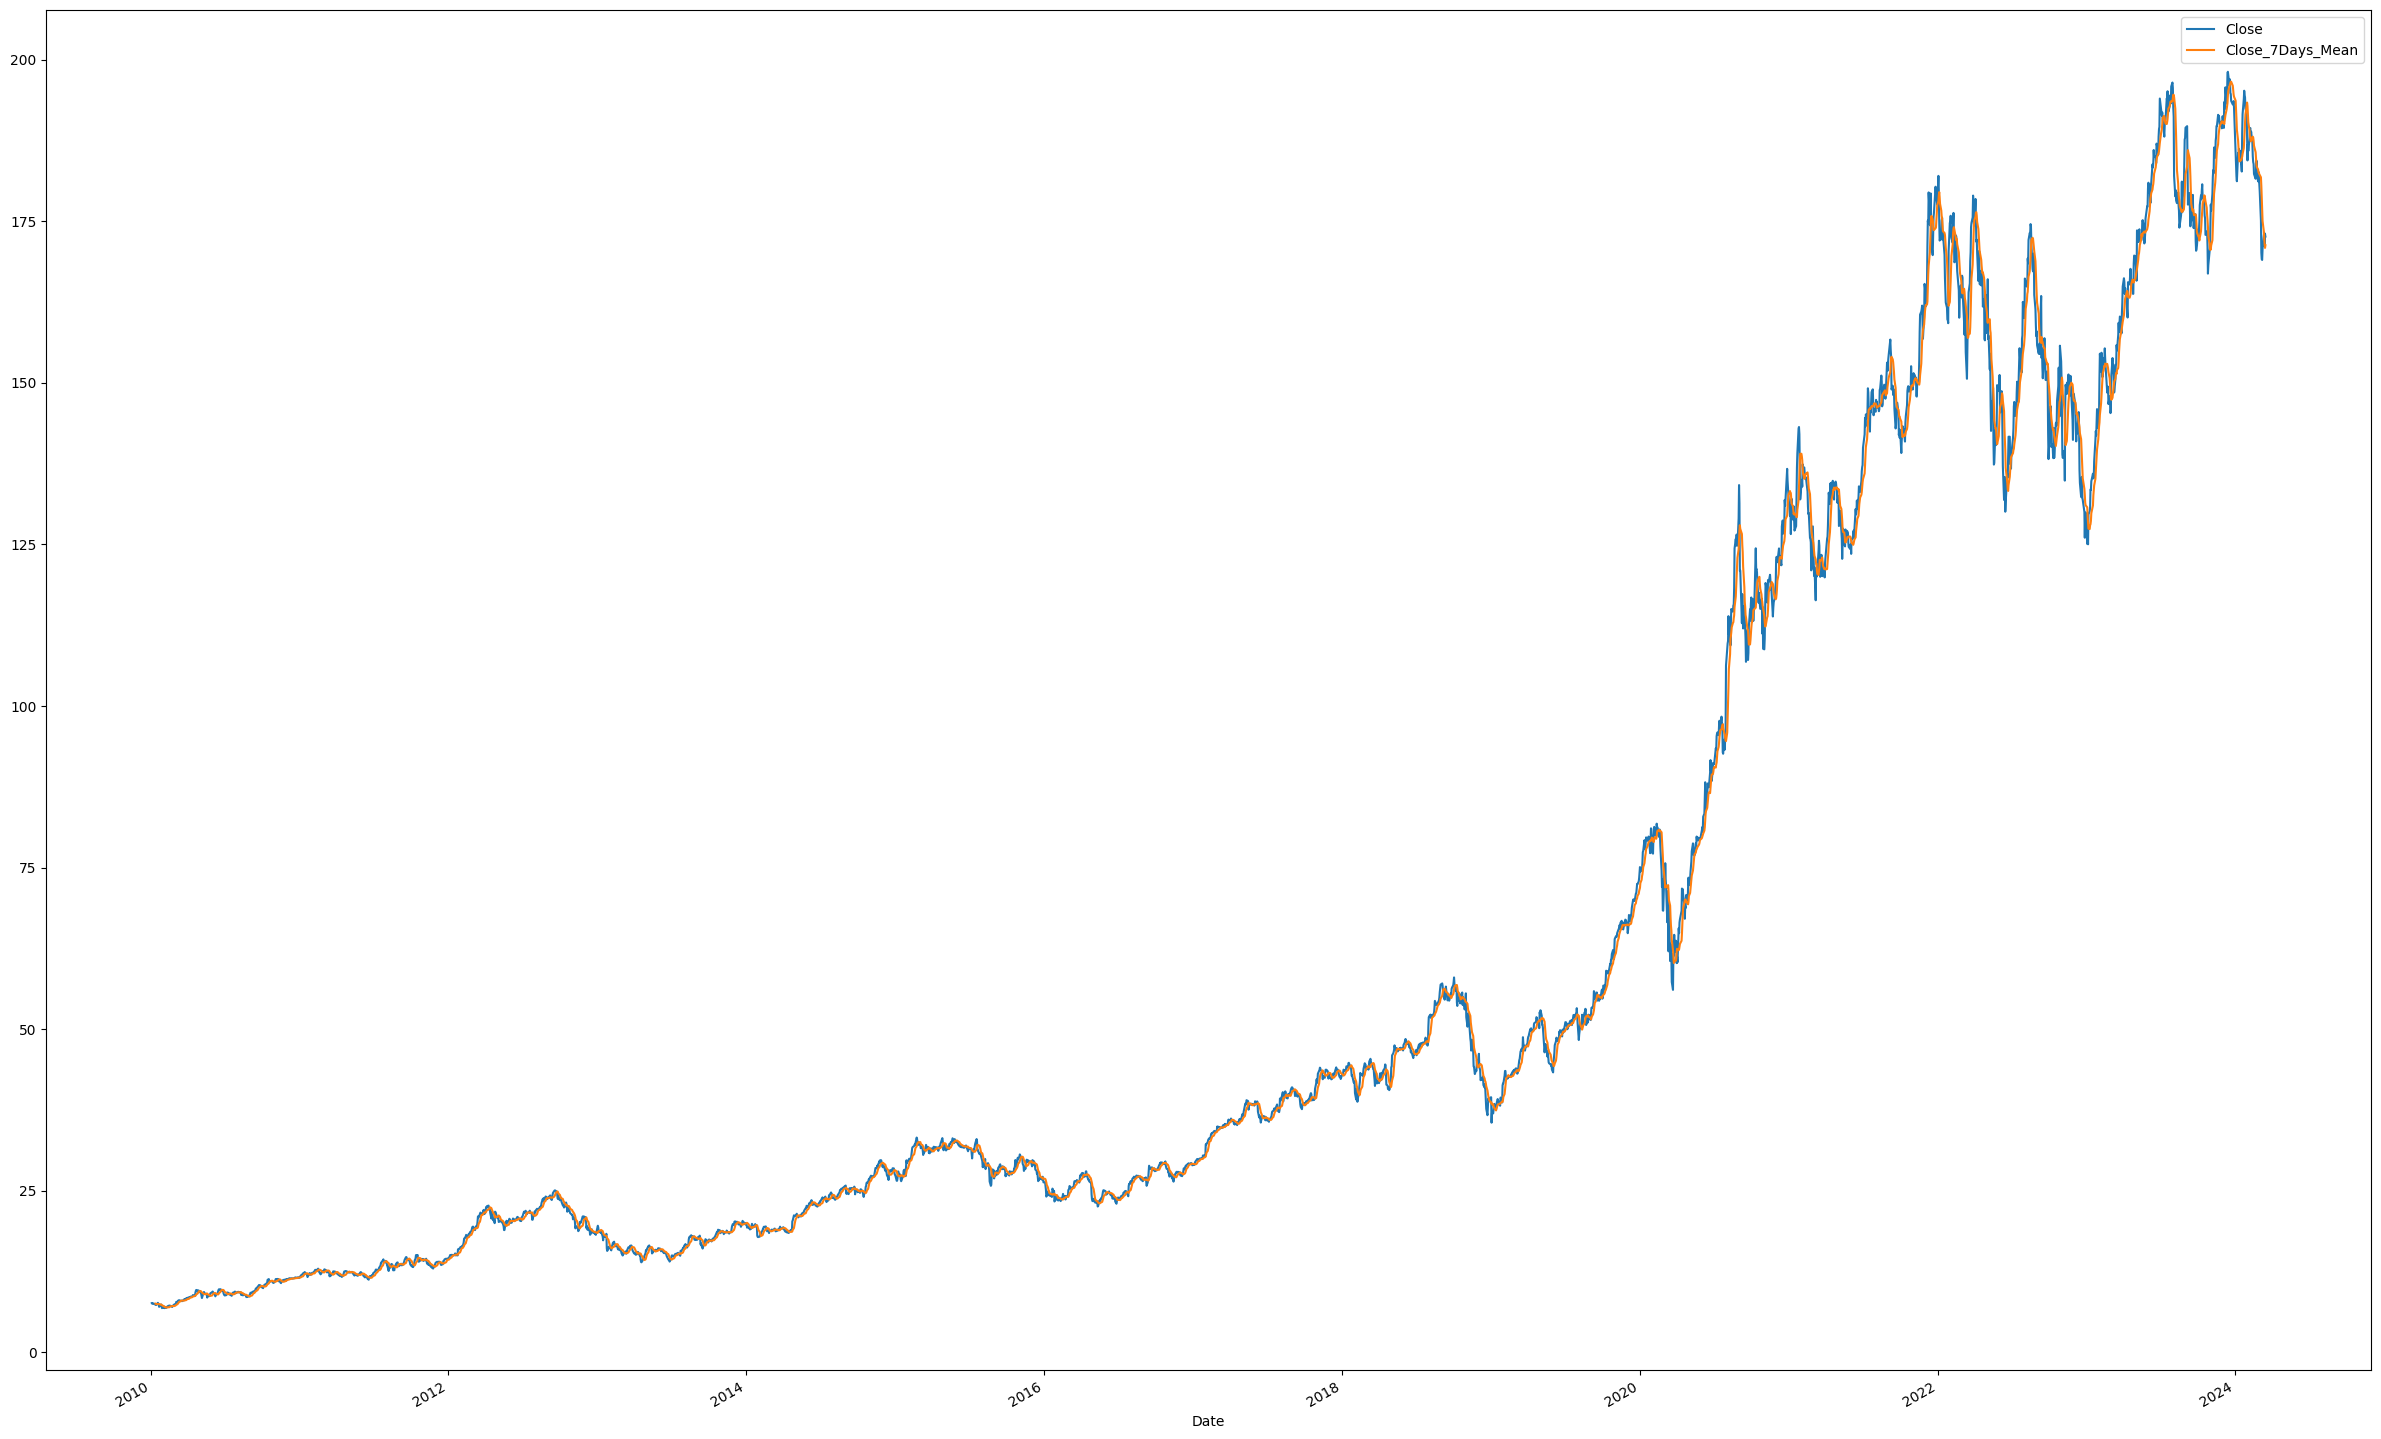

In [6]:
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
df_apple[['Close', 'Close_7Days_Mean']].plot(figsize=(30,20))

### EMA
- 새로운 데이터에 더 많은 가중치를 부여하여 최근 데이터에 더 초점을 맞춤
- 최근 데이터 선호

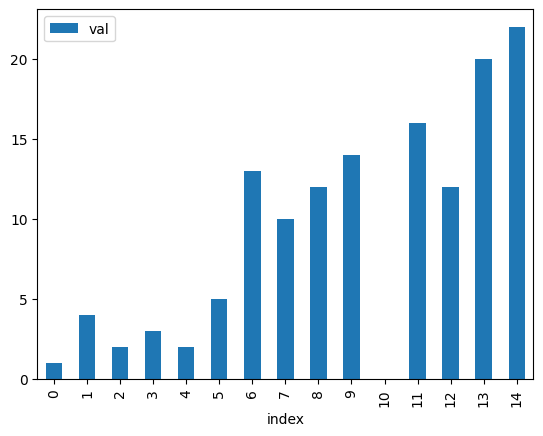

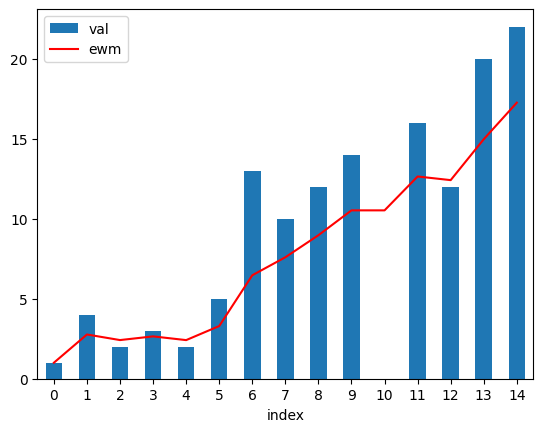

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'val' : [1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
df.plot(kind='bar', x='index', y='val')

df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean())
ax = df.plot(kind='bar', x='index', y='val')
ax2 = df2.plot(kind='line', x='index', y='ewm', color='red', ax=ax)
plt.show()

### 시계열 예측

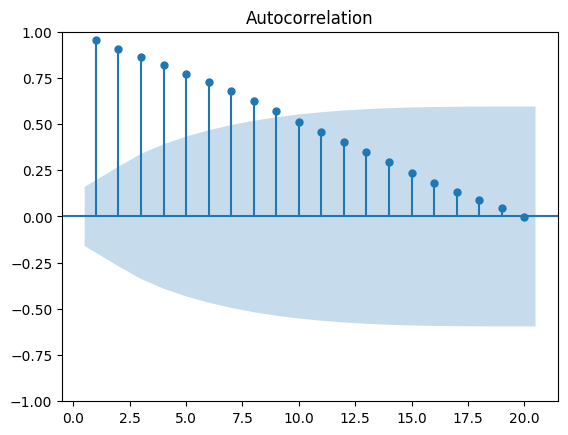

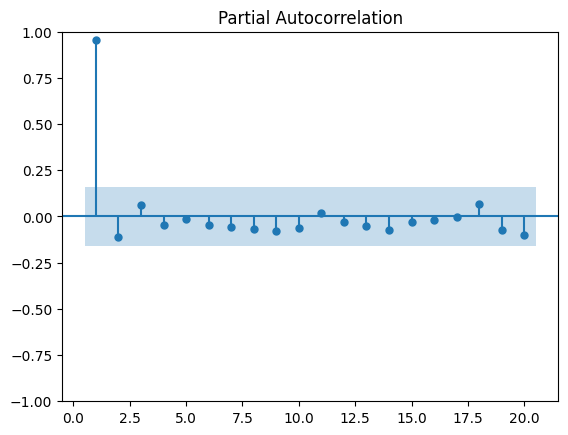

In [11]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pyupbit
pyupbit.get_current_price(["KRW-BTC", "KRW-XRP"])

a=pyupbit.get_ohlcv("KRW-XRP", to="20210301",interval="day",count=150)

sgt.plot_acf(a['close'], lags = 20, zero = False)

sgt.plot_pacf(a['close'], lags = 20, zero = False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

## ADF
def ADF(data):

    result = adfuller(data, autolag="AIC")

    print("---- Adfuller ----")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# ADF(data)